# ***Analyzing Amazon Electronics Sales Data with Python***
*This project delves into the world of online electronics sales by analyzing a dataset from Amazon. Using Python libraries and guided by data science principles, we'll uncover valuable insights into customer behavior, product performance, and sales trends. This exploration will aid in understanding market dynamics and potentially inform strategic business decisions.*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("electronics.csv")
data.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0.0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
1,0,1.0,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
2,0,2.0,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
3,0,3.0,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
4,0,4.0,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0


In [ ]:
cols = data.columns
for index, col_name in enumerate(cols):
  print(f"{index + 1}. {col_name}")

1. item_id
2. user_id
3. rating
4. timestamp
5. model_attr
6. category
7. brand
8. year
9. user_attr
10. split


In [ ]:
data.info()
'''
We can see we have a total of 16565 entries. There are some non null values in
brand and lots of non null values in user_attr
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16565 entries, 0 to 16564
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     16565 non-null  int64  
 1   user_id     16564 non-null  float64
 2   rating      16564 non-null  float64
 3   timestamp   16564 non-null  object 
 4   model_attr  16564 non-null  object 
 5   category    16564 non-null  object 
 6   brand       11540 non-null  object 
 7   year        16564 non-null  float64
 8   user_attr   1194 non-null   object 
 9   split       16564 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


## **SEEING THE USER_ATTR**

In [ ]:
## Seeing the non null values - How they are
data[data["user_attr"].notnull()]["user_attr"]

,user_attr
28,Female
81,Male
131,Male
139,Female
178,Male
...,...
16462,Male
16491,Male
16497,Female
16529,Male


In [ ]:
data["user_attr"].value_counts()

,count
user_attr,
Male,743
Female,451


In [ ]:
## THEY ARE EITHER MALE OR FEMALE. There is a similiar col named model_attr
## which seems to have same type of values. let's see that also
data[data["model_attr"].notnull()]["model_attr"]

,model_attr
0,Female
1,Female
2,Female
3,Female
4,Female
...,...
16559,Male
16560,Female&Male
16561,Male
16562,Female


In [ ]:
data["model_attr"].value_counts()

,count
model_attr,
Female,8181
Male,4215
Female&Male,4168


In [ ]:
data["model_attr"].isnull().sum()

np.int64(1)

In [ ]:
## Only one null value here. So let's drop that value
data = data[data["model_attr"].notnull()]

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Portable Audio & Video'),
  Text(1, 0, 'Computers & Accessories'),
  Text(2, 0, 'Headphones'),
  Text(3, 0, 'Camera & Photo'),
  Text(4, 0, 'Television & Video'),
  Text(5, 0, 'Home Audio'),
  Text(6, 0, 'Accessories & Supplies'),
  Text(7, 0, 'Car Electronics & GPS'),
  Text(8, 0, 'Security & Surveillance')])

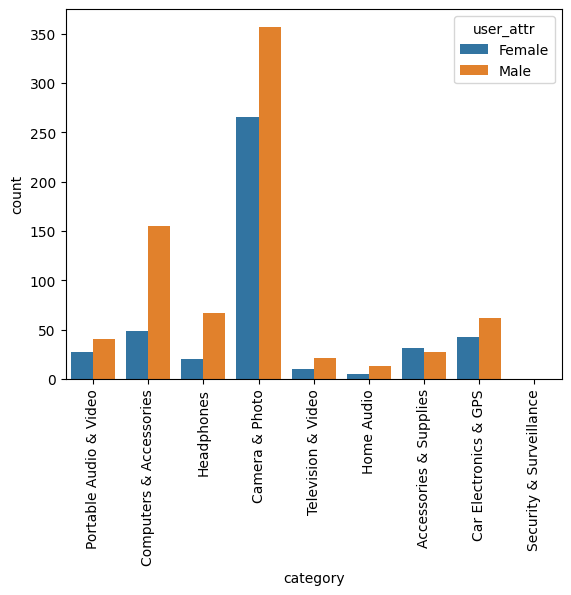

In [ ]:
'''
So basically there are too many null values in user attr. Its best to drop it
But before that let's see the relation between the products and those genders
Some sorta correlation to check if it matters
'''
sns.countplot(x="category", hue="user_attr", data=data)
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Portable Audio & Video'),
  Text(1, 0, 'Computers & Accessories'),
  Text(2, 0, 'Headphones'),
  Text(3, 0, 'Camera & Photo'),
  Text(4, 0, 'Television & Video'),
  Text(5, 0, 'Home Audio'),
  Text(6, 0, 'Accessories & Supplies'),
  Text(7, 0, 'Car Electronics & GPS'),
  Text(8, 0, 'Security & Surveillance')])

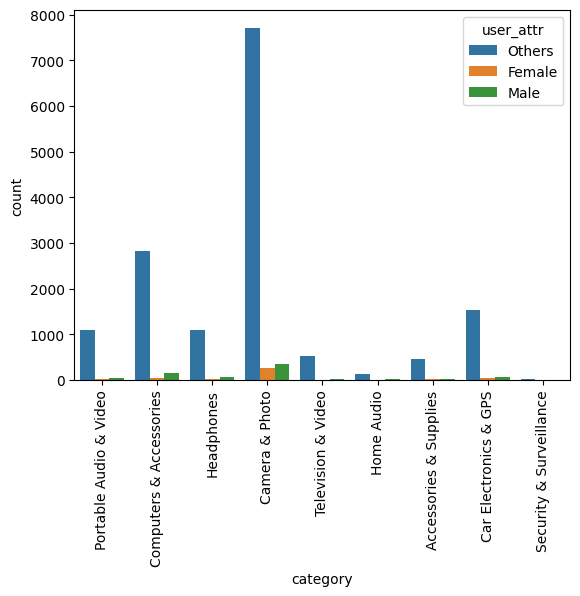

In [ ]:
## Let's try to make the null values as "Others" and check what happens
user_attr = data["user_attr"]
user_attr.fillna("Others", inplace=True)
sns.countplot(x="category", hue="user_attr", data=data)
plt.xticks(rotation=90)

In [ ]:
## Now as this is too much of unknown information let's simply dorp this column
data.drop("user_attr", axis=1, inplace=True)
data.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,split
0,0,0.0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999.0,0.0
1,0,1.0,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999.0,0.0
2,0,2.0,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999.0,0.0
3,0,3.0,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999.0,0.0
4,0,4.0,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16564 entries, 0 to 16563
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     16564 non-null  int64  
 1   user_id     16564 non-null  float64
 2   rating      16564 non-null  float64
 3   timestamp   16564 non-null  object 
 4   model_attr  16564 non-null  object 
 5   category    16564 non-null  object 
 6   brand       11540 non-null  object 
 7   year        16564 non-null  float64
 8   split       16564 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.8+ MB


In [ ]:
# Now we have to see for the brand column as it has null values...tho
# relatively lesser null values
len(data["brand"].value_counts()) ## There are 30 brands in total

30

<ipython-input-44-b0490f091074>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=brands, palette='deep')  # Horizontal bars


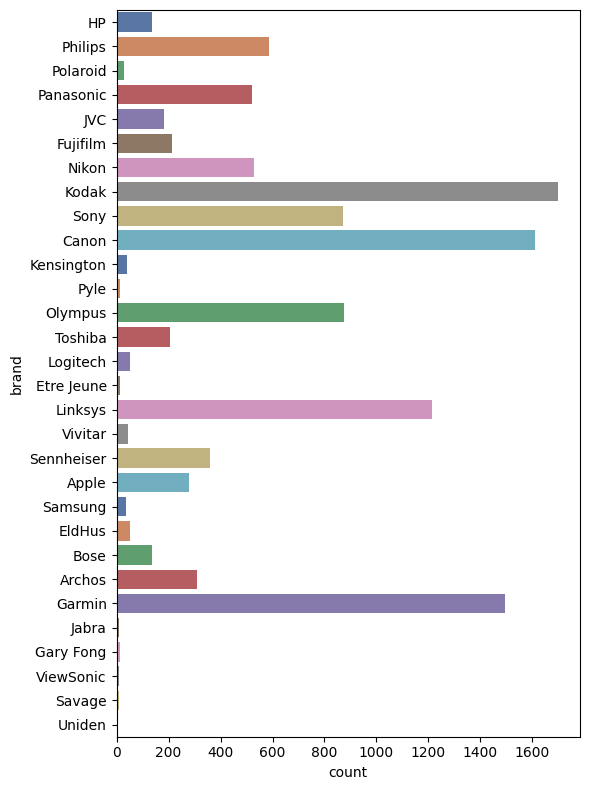

In [ ]:
## What can be done with the null brand values? DROPPING IS NOT A GOOD THING
## Let's check a bar plot for how the given brands do

brands = data[data["brand"].notnull()]["brand"]

plt.figure(figsize=(6, 8))
sns.countplot(y=brands, palette='deep')

plt.tight_layout()
plt.show()

# NIKON, CANON, LINKSYS AND GARMIN ARE MOST BOUGHT BRANDS

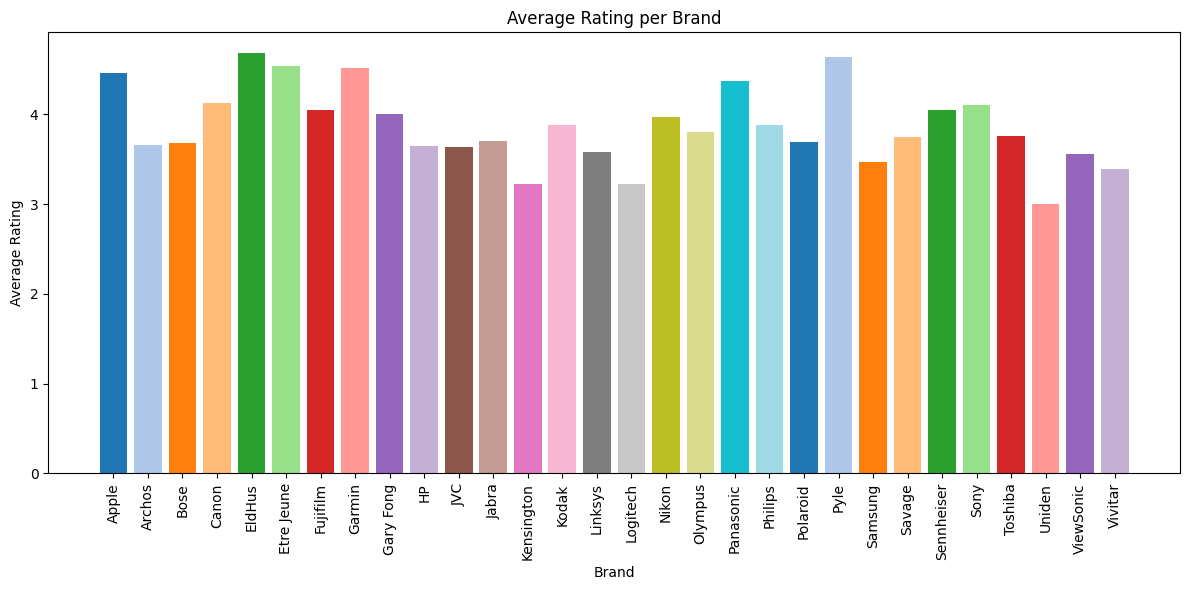

In [ ]:
## Let's check the brands vs ratings
filtered_data = data[data['brand'].notnull() & data['rating'].notnull()]
avg_ratings = filtered_data.groupby('brand')['rating'].mean().reset_index()
avg_ratings.columns = ['brand', 'average_rating']
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
colors = plt.cm.tab20.colors
plt.bar(avg_ratings["brand"], avg_ratings["average_rating"], color=colors[:len(avg_ratings)])
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Average Rating per Brand')
plt.tight_layout()
plt.show()


In [ ]:
## I FEEL THAT THIS IS TOO IMPORTANT OF A COLUMN TO DROP. Let's replace the
## NULL values with other
data["brand"].fillna("Others", inplace=True)
data["brand"]

,brand
0,Others
1,Others
2,Others
3,Others
4,Others
...,...
16559,Sennheiser
16560,Others
16561,Others
16562,Linksys


In [ ]:
data.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,split
0,0,0.0,5.0,1999-06-13,Female,Portable Audio & Video,Others,1999.0,0.0
1,0,1.0,5.0,1999-06-14,Female,Portable Audio & Video,Others,1999.0,0.0
2,0,2.0,3.0,1999-06-17,Female,Portable Audio & Video,Others,1999.0,0.0
3,0,3.0,1.0,1999-07-01,Female,Portable Audio & Video,Others,1999.0,0.0
4,0,4.0,2.0,1999-07-06,Female,Portable Audio & Video,Others,1999.0,0.0


In [ ]:
## Now there are no null values. Let's look at the item id and user id
## If they are relevant or not to us

print(len(data["item_id"].value_counts()))
print(len(data["user_id"].value_counts()))

695
16088


In [ ]:
# So basically the user ids are too much and I think they wont affect the data
# that much to be fair.

## for product or brand-level analysis, the user IDs are mostly irrelevant
# let's drop it
data.drop("user_id", inplace=True, axis=1)
data.head(3)

,item_id,rating,timestamp,model_attr,category,brand,year,split
0,0,5.0,1999-06-13,Female,Portable Audio & Video,Others,1999.0,0.0
1,0,5.0,1999-06-14,Female,Portable Audio & Video,Others,1999.0,0.0
2,0,3.0,1999-06-17,Female,Portable Audio & Video,Others,1999.0,0.0


In [ ]:
'''
Now the thing with the item_id is that....basically we have categories and
ite id represents the items from that category/
Means 0 represents item from PORTABLE AUDIO & VIDEO category and not
that PORTABLE AUDIO & VIDEO category.

Let's confirm it
'''
for i in list(data["item_id"].unique()):
  res = len(data[data["item_id"] == i]) == len(data[data["item_id"] == i][data[data["item_id"] == i]["category"] == "Portable Audio & Video"])
  # print(res, end = " ")

# OUTPUTS - True False False False False False Fals............
# PROVING OUR POINTS

In [ ]:
## Let's look others
data.head(1)

,item_id,rating,timestamp,model_attr,category,brand,year,split
0,0,5.0,1999-06-13,Female,Portable Audio & Video,Others,1999.0,0.0


<Axes: xlabel='rating', ylabel='count'>

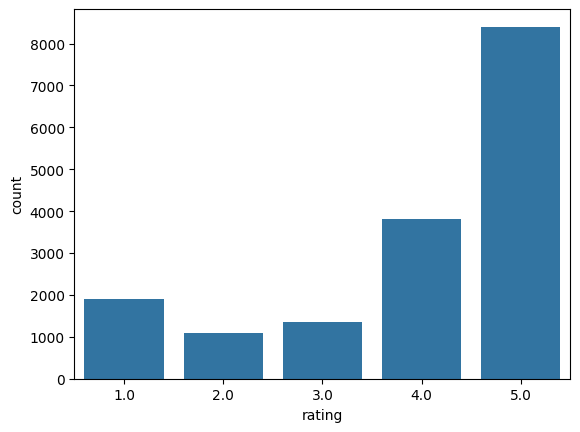

In [ ]:
# the distribution of ratings

sns.countplot(x='rating', data=data)

<Axes: xlabel='year'>

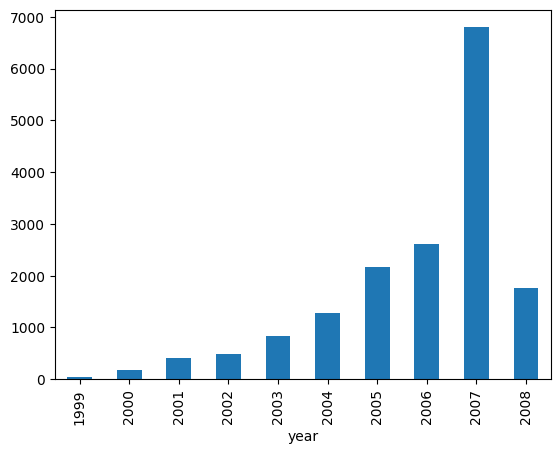

In [ ]:
# what was the best year of sales

data['year'] = pd.DatetimeIndex(data['timestamp']).year

data.groupby('year')['rating'].count().plot(kind='bar')

In [ ]:
# what brand sold the most in 2015
data['year'] = pd.DatetimeIndex(data['timestamp']).year
data["year"]

,year
0,1999
1,1999
2,1999
3,1999
4,1999
...,...
16559,2008
16560,2008
16561,2008
16562,2008


<Axes: xlabel='brand'>

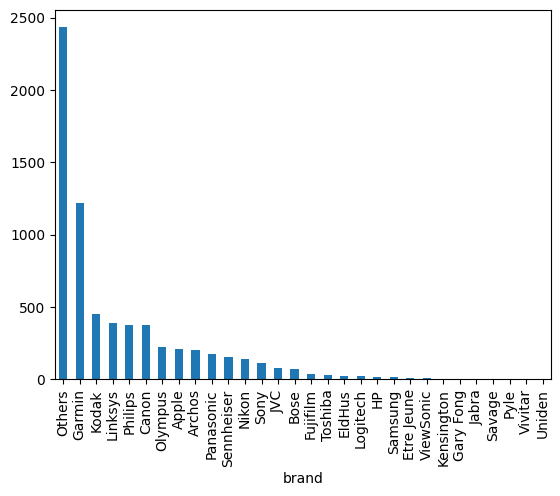

In [ ]:
data_2007 = data[data["year"] == 2007]
product_2007 = data_2007.groupby("brand")["rating"].count().sort_values(ascending=False)
product_2007.plot(kind="bar")